In [ ]:
 # !pip install copulas
!pip install pydantic

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, StackingRegressor, ExtraTreesRegressor
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from joblib import dump, load
import warnings
warnings.filterwarnings('ignore')

In [ ]:
frame = pd.read_excel('new_flats (1) (1).xlsx')

del frame['Unnamed: 0']
del frame['levels']

In [ ]:
unique_ = frame['size'].unique()
print(unique_)

['Евро 2-к' 'Евро 3-к' '3-комнатная' 'Студия' '1-комнатная' '2-комнатная'
 'Евро 5-к' 'Евро 4-к']


In [ ]:
frame

,porch,size_type,floor,room,balcony,renovation,area,living_area,kitchen_area,bathroom,latitude,longitude,size,price,metro_minute_distance,metro_name
0,1,EURO,24,1,1,Без отделки,46.27,15.19,15.36,совмещенный,55.86,37.38,Евро 2-к,16896046,27.06,Митино (стр.)
1,2,EURO,22,1,1,Без отделки,35.14,11.82,14.50,совмещенный,55.73,37.74,Евро 2-к,18632629,24.23,Текстильшики
2,2,EURO,23,1,1,Без отделки,35.14,11.82,14.50,совмещенный,55.73,37.74,Евро 2-к,18664565,24.23,Текстильшики
3,2,EURO,24,2,1,Без отделки,56.19,25.11,18.71,раздельный,55.73,37.74,Евро 3-к,25091523,24.23,Текстильшики
4,2,EURO,24,1,1,Без отделки,35.14,11.82,14.50,совмещенный,55.73,37.74,Евро 2-к,18696572,24.23,Текстильшики
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3392,1,EURO,23,0,1,Чистовая,22.70,15.50,2.00,совмещенный,55.85,37.59,Студия,10643131,2.20,Владыкино
3393,1,EURO,23,0,1,Чистовая,22.70,15.50,2.00,совмещенный,55.85,37.59,Студия,10643131,2.20,Владыкино
3394,1,EURO,23,0,1,Чистовая,23.00,15.80,2.00,совмещенный,55.85,37.59,Студия,10736968,2.20,Владыкино
3395,1,EURO,23,2,1,Чистовая,62.70,49.10,2.00,совмещенный,55.85,37.59,2-комнатная,24772027,2.20,Владыкино


        porch   floor    room  balcony    area  living_area  kitchen_area  \
count 3397.00 3397.00 3397.00  3397.00 3397.00      3397.00       3397.00   
mean     2.30   12.56    0.77     0.68   37.67        20.15          6.75   
std      2.55    6.96    0.78     0.47   15.19         9.18          6.10   
min      1.00    2.00    0.00     0.00   19.60         9.16          0.90   
25%      1.00    6.00    0.00     0.00   24.30        13.30          2.00   
50%      1.00   12.00    1.00     1.00   34.80        16.60          5.29   
75%      1.00   18.00    1.00     1.00   44.30        24.90         10.38   
max      9.00   28.00    4.00     1.00  114.10        59.20         35.60   

       latitude  longitude       price  metro_minute_distance  
count   3397.00    3397.00     3397.00                3397.00  
mean      55.80      37.62 15628519.48                  12.02  
std        0.05       0.09  7140819.50                  10.03  
min       55.73      37.38  7263352.00            

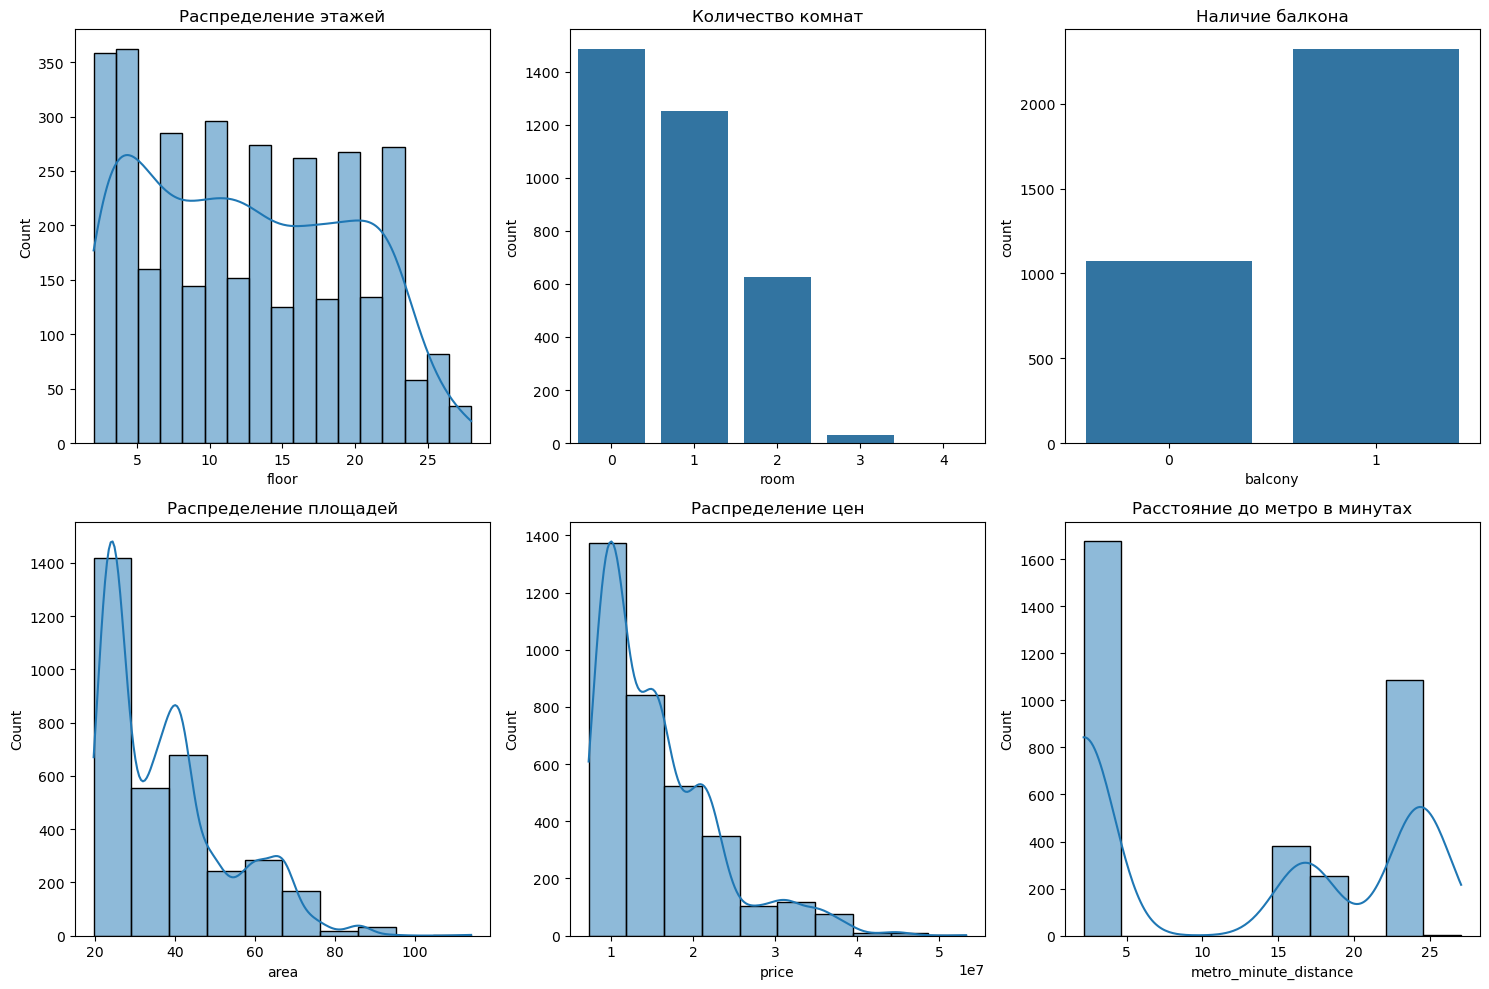

In [ ]:
# Отображение описательной статистики
print(frame.describe())

# Построение гистограмм и счетчиков для каждого параметра
plt.figure(figsize=(15, 10))

# Гистограмма этажей
plt.subplot(2, 3, 1)
sns.histplot(frame['floor'], kde=True)
plt.title('Распределение этажей')

# Гистограмма количества комнат
plt.subplot(2, 3, 2)
sns.countplot(x='room', data=frame)
plt.title('Количество комнат')

# Гистограмма наличия балкона
plt.subplot(2, 3, 3)
sns.countplot(x='balcony', data=frame)
plt.title('Наличие балкона')

# Гистограмма площадей
plt.subplot(2, 3, 4)
sns.histplot(frame['area'], bins=10, kde=True)
plt.title('Распределение площадей')

# Гистограмма цен
plt.subplot(2, 3, 5)
sns.histplot(frame['price'], bins=10, kde=True)
plt.title('Распределение цен')

# Гистограмма расстояния до метро
plt.subplot(2, 3, 6)
sns.histplot(frame['metro_minute_distance'], bins=10, kde=True)
plt.title('Расстояние до метро в минутах')

plt.tight_layout()
plt.show()

Этажность (floor): Средняя этажность составляет примерно 12.56, при этом стандартное отклонение 6.96 указывает на значительное разнообразие этажей в датасете. Диапазон значений от 2 до 28 этажей.

Количество комнат (room): Большинство квартир имеют от 0 до 1 комнаты, среднее значение около 0.77, что может говорить о преобладании студий и однокомнатных квартир. Максимальное значение 4 комнаты.

Наличие балкона (balcony): В среднем, большинство квартир (около 68%) имеют балкон.

Площадь квартир (area): Средняя площадь квартир составляет около 37.67 кв.м., с стандартным отклонением 15.19, что указывает на разнообразие площадей относительно большое. Минимальная площадь 19.6 кв.м., максимальная — 114.1 кв.м.

Цена (price): Средняя цена примерно 15.63 млн рублей, с большим разбросом в ценах (стандартное отклонение около 7.14 млн рублей). Максимальная цена достигает 53.24 млн рублей.

Расстояние до метро (metro_minute_distance): Среднее расстояние до метро составляет 12.02 минут, при этом 50% данных лежат за пределами 16.27 минут, что может указывать на локацию большей части недвижимости в районах, более удаленных от центра.

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Создаем экземпляр класса LabelEncoder для категориальных столбцов
label_encoders = {}
categorical_columns_to_encode = ['size_type', 'renovation','bathroom', 'size','metro_name']

for column in categorical_columns_to_encode:
    label_encoders[column] = LabelEncoder()
    frame[column + '_encoded'] = label_encoders[column].fit_transform(frame[column])

# Удаляем оригинальные категориальные столбцы (если требуется)
frame = frame.drop(columns=categorical_columns_to_encode)

# Вывод результата
frame

,porch,floor,room,balcony,area,living_area,kitchen_area,latitude,longitude,price,metro_minute_distance,size_type_encoded,renovation_encoded,bathroom_encoded,size_encoded,metro_name_encoded
0,1,24,1,1,46.27,15.19,15.36,55.86,37.38,16896046,27.06,1,0,2,3,2
1,2,22,1,1,35.14,11.82,14.50,55.73,37.74,18632629,24.23,1,0,2,3,4
2,2,23,1,1,35.14,11.82,14.50,55.73,37.74,18664565,24.23,1,0,2,3,4
3,2,24,2,1,56.19,25.11,18.71,55.73,37.74,25091523,24.23,1,0,1,4,4
4,2,24,1,1,35.14,11.82,14.50,55.73,37.74,18696572,24.23,1,0,2,3,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3392,1,23,0,1,22.70,15.50,2.00,55.85,37.59,10643131,2.20,1,1,2,7,1
3393,1,23,0,1,22.70,15.50,2.00,55.85,37.59,10643131,2.20,1,1,2,7,1
3394,1,23,0,1,23.00,15.80,2.00,55.85,37.59,10736968,2.20,1,1,2,7,1
3395,1,23,2,1,62.70,49.10,2.00,55.85,37.59,24772027,2.20,1,1,2,1,1


<Axes: >

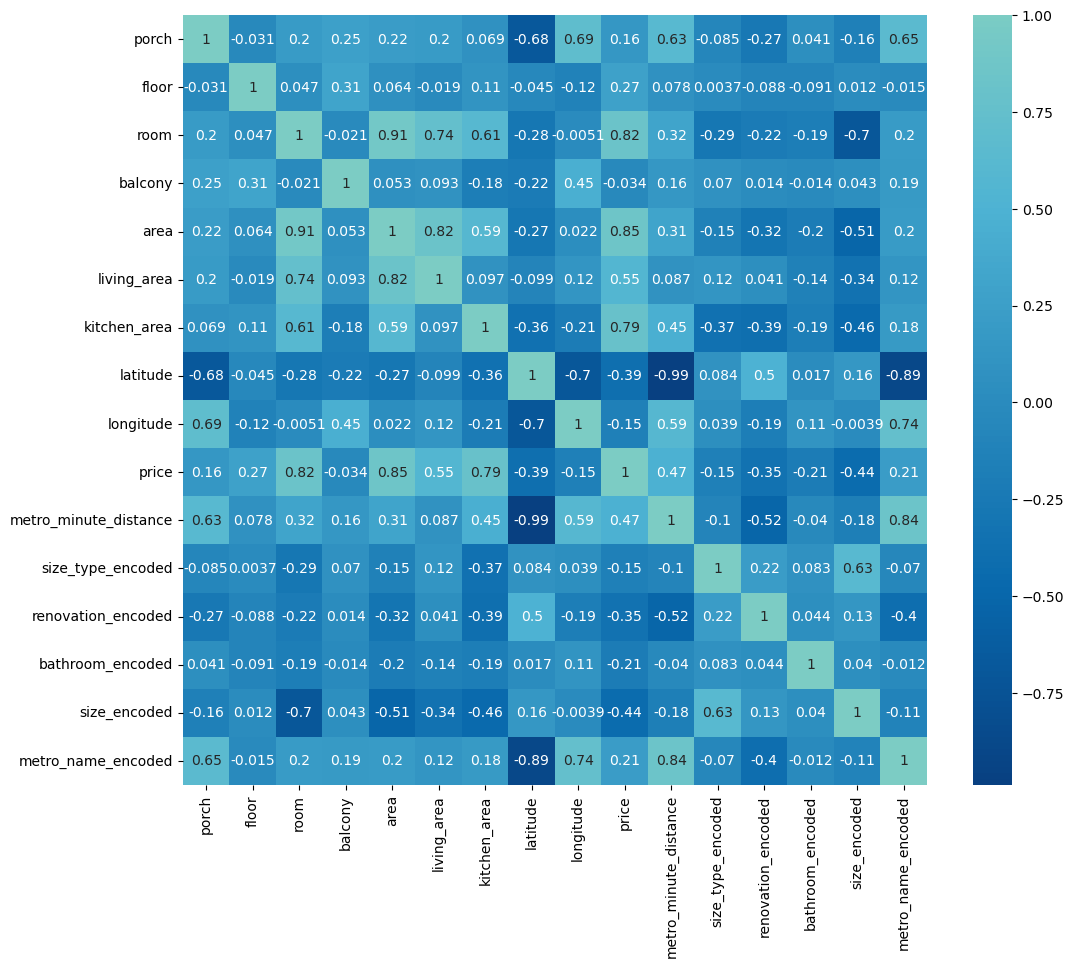

In [ ]:
from sklearn.preprocessing import LabelEncoder

correlations = frame.corr()

fig = plt.figure(figsize=(12, 10))

sns.heatmap(correlations, annot=True, cmap='GnBu_r', center=1)

удаление выбросов

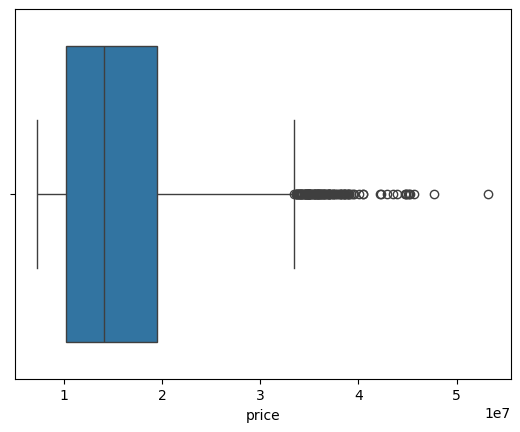

count       3277.00
mean    14838183.06
std      5894028.26
min      7263352.00
25%     10075480.00
50%     13609905.00
75%     18479818.00
max     33413905.00
Name: price, dtype: float64


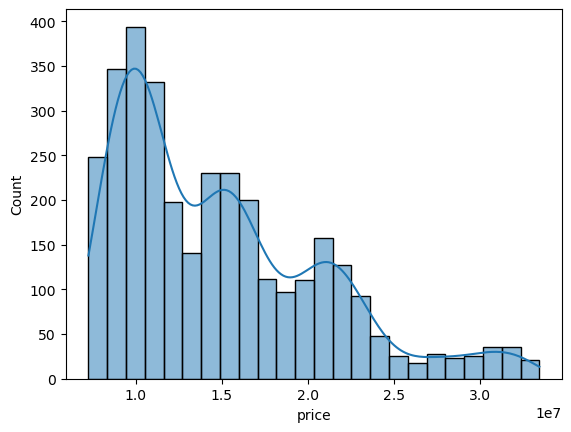

In [ ]:
# Визуализация распределения цен
sns.boxplot(x=frame['price'])
plt.show()

# Определение границ для выбросов
Q1 = frame['price'].quantile(0.25)
Q3 = frame['price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Фильтрация данных без выбросов
frame = frame[(frame['price'] >= lower_bound) & (frame['price'] <= upper_bound)]

# Новая статистика после удаления выбросов
print(frame['price'].describe())

# Новое распределение цен без выбросов
sns.histplot(frame['price'], kde=True)
plt.show()

In [ ]:
# удаляем квартиры где 4 комнаты так как их всего 2
frame = frame.loc[frame['room'] != 4]

In [ ]:

del frame['latitude']
del frame['longitude']
del frame['porch']
del frame['size_type_encoded']
del frame['metro_name_encoded']
del frame['kitchen_area']
del frame['living_area']


del frame['renovation_encoded']
del frame['bathroom_encoded']
del frame['size_encoded']

In [ ]:
frame

,floor,room,balcony,area,price,metro_minute_distance
0,24,1,1,46.27,16896046,27.06
1,22,1,1,35.14,18632629,24.23
2,23,1,1,35.14,18664565,24.23
3,24,2,1,56.19,25091523,24.23
4,24,1,1,35.14,18696572,24.23
...,...,...,...,...,...,...
3392,23,0,1,22.70,10643131,2.20
3393,23,0,1,22.70,10643131,2.20
3394,23,0,1,23.00,10736968,2.20
3395,23,2,1,62.70,24772027,2.20


Построение копул по всему датасету, для выбора лучшей и проверка на тесте акаике

In [ ]:
from sklearn.preprocessing import StandardScaler
from copulas.multivariate import GaussianMultivariate, VineCopula
from statsmodels.distributions.copula.api import ClaytonCopula, FrankCopula
import pandas as pd
import numpy as np

# Фильтрация данных по количеству комнат
data_= frame


# Нормализация данных для двушек
scaler_ = StandardScaler()
data_normalized = scaler_.fit_transform(data_[['floor', 'room', 'balcony','area', 'price', 'metro_minute_distance']])
data_normalized = pd.DataFrame(data_normalized, columns=['floor', 'room', 'balcony','area', 'price', 'metro_minute_distance'])

data_normalized

,floor,room,balcony,area,price,metro_minute_distance
0,1.69,0.39,0.68,0.72,0.35,1.51
1,1.40,0.39,0.68,-0.09,0.64,1.23
2,1.55,0.39,0.68,-0.09,0.65,1.23
3,1.69,1.75,0.68,1.45,1.74,1.23
4,1.69,0.39,0.68,-0.09,0.65,1.23
...,...,...,...,...,...,...
3272,1.55,-0.97,0.68,-1.00,-0.71,-0.95
3273,1.55,-0.97,0.68,-1.00,-0.71,-0.95
3274,1.55,-0.97,0.68,-0.98,-0.70,-0.95
3275,1.55,1.75,0.68,1.92,1.69,-0.95


In [ ]:
# Проверка наличия значений NaN в DataFrame
nan_values = data_normalized.isnull().sum().sum()
if nan_values > 0:
    print("В данных есть значения NaN.")
else:
    print("В данных нет значений NaN.")

В данных нет значений NaN.


In [ ]:
# Создание и обучение модели GaussianMultivariate
copula_g = GaussianMultivariate()
copula_g.fit(data_normalized)

data_normalized

,floor,room,balcony,area,price,metro_minute_distance
0,1.69,0.39,0.68,0.72,0.35,1.51
1,1.40,0.39,0.68,-0.09,0.64,1.23
2,1.55,0.39,0.68,-0.09,0.65,1.23
3,1.69,1.75,0.68,1.45,1.74,1.23
4,1.69,0.39,0.68,-0.09,0.65,1.23
...,...,...,...,...,...,...
3272,1.55,-0.97,0.68,-1.00,-0.71,-0.95
3273,1.55,-0.97,0.68,-1.00,-0.71,-0.95
3274,1.55,-0.97,0.68,-0.98,-0.70,-0.95
3275,1.55,1.75,0.68,1.92,1.69,-0.95


In [ ]:
parameters = copula_g.to_dict()
parameters['correlation']

[[1.0,
  0.0029002408074972506,
  0.3329429866997264,
  0.05953588119242382,
  0.29560256375934274,
  0.07413962480735473],
 [0.0029002408074972506,
  1.0,
  -0.015371615880571609,
  0.8926889869582808,
  0.8164461816205432,
  0.28085445511315676],
 [0.3329429866997264,
  -0.015371615880571609,
  1.0,
  0.08304012160639665,
  0.02543572240957687,
  0.20100938437690063],
 [0.05953588119242382,
  0.8926889869582808,
  0.08304012160639665,
  1.0,
  0.830149447624493,
  0.27123075217624404],
 [0.29560256375934274,
  0.8164461816205432,
  0.02543572240957687,
  0.830149447624493,
  1.0,
  0.5042472765030357],
 [0.07413962480735473,
  0.28085445511315676,
  0.20100938437690063,
  0.27123075217624404,
  0.5042472765030357,
  1.0]]

In [ ]:
X = data_normalized[['floor', 'room', 'balcony','area', 'metro_minute_distance']]
y = data_normalized['price']

# Параметры AIC надо вычислять для каждой модели, а не один раз за весь цикл
k = X.shape[1] * (X.shape[1] + 1) / 2  # Количество параметров модели
n = len(y)  # Количество наблюдений

    # Среднее значение и ковариационная матрица данных X
mu = X.mean(axis=0).values
cov = X.cov().values

    # Вычисление логарифма функции правдоподобия
log_likelihood = np.sum(
        -0.5 * np.sum((X - mu) @ np.linalg.inv(cov) * (X - mu), axis=1) -
        0.5 * X.shape[1] * np.log(2 * np.pi) -
        0.5 * np.log(np.linalg.det(cov))
    )

    # Оценка AIC
aic = -2 * log_likelihood + 2 * k
print(aic)

23644.505301203968


Построение копул для двух, трех комнатных квартир, моделирование данных

In [ ]:
from sklearn.preprocessing import StandardScaler
from copulas.multivariate import GaussianMultivariate, VineCopula
from statsmodels.distributions.copula.api import ClaytonCopula, FrankCopula
import pandas as pd
import numpy as np

# Фильтрация данных по количеству комнат
data_two = frame[frame['room'] == 2]
data_three = frame[frame['room'] == 3]

# Нормализация данных для двушек
scaler_two = StandardScaler()
data_two_normalized = scaler_two.fit_transform(data_two[['floor', 'room', 'balcony','area', 'price', 'metro_minute_distance']])
data_two_normalized = pd.DataFrame(data_two_normalized, columns=['floor', 'room', 'balcony','area', 'price', 'metro_minute_distance'])

# Нормализация данных для трешек
scaler_three = StandardScaler()
data_three_normalized = scaler_three.fit_transform(data_three[['floor', 'room', 'balcony','area', 'price', 'metro_minute_distance']])
data_three_normalized = pd.DataFrame(data_three_normalized, columns=['floor', 'room', 'balcony','area', 'price', 'metro_minute_distance'])

In [ ]:
data_two

,floor,room,balcony,area,price,metro_minute_distance
3,24,2,1,56.19,25091523,24.23
6,2,2,0,62.20,27091143,16.47
7,2,2,0,61.80,28685634,16.47
10,2,2,0,57.00,28027599,16.47
12,3,2,0,61.50,28038711,16.47
...,...,...,...,...,...,...
3376,22,2,1,41.90,16622979,2.20
3383,22,2,1,62.70,24438641,2.20
3387,23,2,1,41.40,16757113,2.20
3388,23,2,1,41.90,16848293,2.20


In [ ]:
data_two_normalized

,floor,room,balcony,area,price,metro_minute_distance
0,1.75,0.00,0.67,-0.36,0.36,0.97
1,-1.51,0.00,-1.48,0.31,0.72,0.13
2,-1.51,0.00,-1.48,0.26,1.02,0.13
3,-1.51,0.00,-1.48,-0.27,0.90,0.13
4,-1.36,0.00,-1.48,0.23,0.90,0.13
...,...,...,...,...,...,...
527,1.46,0.00,0.67,-1.95,-1.20,-1.42
528,1.46,0.00,0.67,0.36,0.24,-1.42
529,1.60,0.00,0.67,-2.01,-1.17,-1.42
530,1.60,0.00,0.67,-1.95,-1.15,-1.42


In [ ]:
# Создание и обучение модели GaussianMultivariate для двушек
copula_two = GaussianMultivariate()
copula_two.fit(data_two_normalized)

# Генерация данных для двушек
sampled_two = copula_two.sample(1300 - len(data_two))
sampled_two = scaler_two.inverse_transform(sampled_two)
sampled_two_df = pd.DataFrame(sampled_two, columns=['floor', 'room', 'balcony','area', 'price', 'metro_minute_distance'])

# Вывод сгенерированных данных для проверки
print("Sampled Data for Two-bedroom Apartments:")
print(sampled_two_df.head())

Sampled Data for Two-bedroom Apartments:
   floor  room  balcony  area       price  metro_minute_distance
0  13.04  2.00     1.01 67.30 23695046.82                   2.98
1  20.80  2.00     1.25 75.68 28279330.22                  27.89
2   8.80  2.00     0.98 62.38 20685862.22                   1.62
3  16.51  2.00     0.92 67.67 24858641.58                   0.22
4  24.27  2.00     0.95 49.93 24493406.82                   0.60


In [ ]:
parameters = copula_two.to_dict()
parameters['correlation']

[[1.0000001192092896,
  0.0,
  0.14426340452505418,
  0.06519346694941203,
  0.27640935174473136,
  -0.0373505222715067],
 [0.0, 1.1920928955078125e-07, 0.0, 0.0, 0.0, 0.0],
 [0.14426340452505418,
  0.0,
  1.0000001192092896,
  0.28833165340760486,
  -0.266354766113833,
  0.23891136327573256],
 [0.06519346694941203,
  0.0,
  0.28833165340760486,
  1.0000001192092896,
  0.43192400522809393,
  0.5238198522480821],
 [0.27640935174473136,
  0.0,
  -0.266354766113833,
  0.43192400522809393,
  1.0000001192092896,
  0.3188084920177558],
 [-0.0373505222715067,
  0.0,
  0.23891136327573256,
  0.5238198522480821,
  0.3188084920177558,
  1.0000001192092896]]

In [ ]:
sampled_two_df[['floor','room', 'balcony']] = sampled_two_df[['floor','room', 'balcony']].round()
sampled_two_df

,floor,room,balcony,area,price,metro_minute_distance
0,13.00,2.00,1.00,67.30,23695046.82,2.98
1,21.00,2.00,1.00,75.68,28279330.22,27.89
2,9.00,2.00,1.00,62.38,20685862.22,1.62
3,17.00,2.00,1.00,67.67,24858641.58,0.22
4,24.00,2.00,1.00,49.93,24493406.82,0.60
...,...,...,...,...,...,...
763,20.00,2.00,0.00,60.61,20635683.72,24.69
764,12.00,2.00,0.00,68.92,33953579.39,22.76
765,27.00,2.00,1.00,74.63,33065734.61,26.46
766,28.00,2.00,1.00,65.57,35771664.80,20.93


In [ ]:
pd.set_option('display.float_format', '{:.2f}'.format)

# Вывод DataFrame с отформатированным столбцом price
sampled_two_df

,floor,room,balcony,area,price,metro_minute_distance
0,14.00,2.00,-0.00,65.33,27479617.06,21.79
1,12.00,2.00,0.00,56.52,23191278.70,10.17
2,4.00,2.00,1.00,65.15,19553260.67,28.21
3,3.00,2.00,-0.00,60.79,17014610.04,3.47
4,8.00,2.00,1.00,65.71,28295566.35,18.26
...,...,...,...,...,...,...
763,4.00,2.00,1.00,59.03,14693573.37,24.72
764,22.00,2.00,1.00,56.43,27725098.37,12.73
765,4.00,2.00,1.00,60.64,20894049.04,-0.09
766,21.00,2.00,-0.00,34.27,11060763.80,-0.49


In [ ]:
# Проверка наличия отрицательных значений в каждом столбце DataFrame
negative_values = (sampled_two_df < 0).any(axis=0)

# Вывод столбцов с отрицательными значениями
print("Столбцы с отрицательными значениями:")
print(negative_values)

Столбцы с отрицательными значениями:
floor                    False
room                     False
balcony                  False
area                     False
price                    False
metro_minute_distance     True
dtype: bool


In [ ]:
# Подсчет количества строк с отрицательными значениями во всех столбцах DataFrame
negative_rows_count = (sampled_two_df < 0).any(axis=1).sum()

# Вывод количества строк с отрицательными значениями
print("Количество строк с отрицательными значениями:", negative_rows_count)

# Удаление строк с отрицательными значениями
sampled_two_df = sampled_two_df[~(sampled_two_df < 0).any(axis=1)]

# Вывод обновленного DataFrame после удаления строк
print("DataFrame после удаления строк с отрицательными значениями:")
sampled_two_df

Количество строк с отрицательными значениями: 52
DataFrame после удаления строк с отрицательными значениями:


,floor,room,balcony,area,price,metro_minute_distance
0,14.00,2.00,-0.00,65.33,27479617.06,21.79
1,12.00,2.00,0.00,56.52,23191278.70,10.17
2,4.00,2.00,1.00,65.15,19553260.67,28.21
3,3.00,2.00,-0.00,60.79,17014610.04,3.47
4,8.00,2.00,1.00,65.71,28295566.35,18.26
...,...,...,...,...,...,...
760,24.00,2.00,1.00,65.39,24473634.46,26.51
762,5.00,2.00,-0.00,59.14,31476045.85,1.43
763,4.00,2.00,1.00,59.03,14693573.37,24.72
764,22.00,2.00,1.00,56.43,27725098.37,12.73


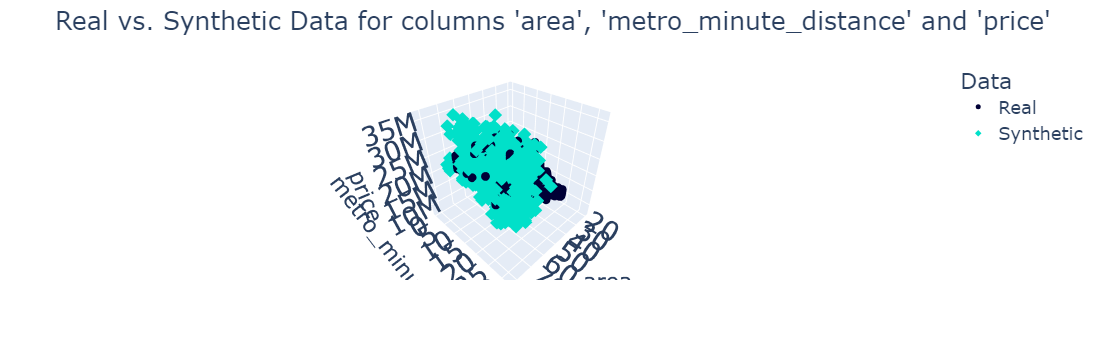

In [ ]:
from copulas.visualization import compare_3d

# Визуализация реальных и сгенерированных данных
compare_3d(frame[['area', 'metro_minute_distance', 'price']], sampled_two_df[['area', 'metro_minute_distance', 'price']])

In [ ]:
unique_ = sampled_two_df['room'].unique()
print(unique_)

[2.]


для трехкомнатных

In [ ]:
data_three

,floor,room,balcony,area,price,metro_minute_distance
5,2,3,0,74.60,31646617,16.47
19,4,3,0,73.70,32872741,16.47
34,7,3,0,73.70,33335770,16.47
1665,22,3,1,67.75,32262678,24.37
1673,23,3,1,67.75,32633699,24.37
1681,24,3,1,67.75,33008986,24.37
1689,25,3,1,67.75,33388589,24.37


In [ ]:
data_three_normalized

,floor,room,balcony,area,price,metro_minute_distance
0,-1.38,0.00,-1.15,1.34,-1.90,-1.15
1,-1.17,0.00,-1.15,1.05,0.24,-1.15
2,-0.86,0.00,-1.15,1.05,1.05,-1.15
3,0.70,0.00,0.87,-0.86,-0.82,0.87
4,0.80,0.00,0.87,-0.86,-0.18,0.87
5,0.91,0.00,0.87,-0.86,0.48,0.87
6,1.01,0.00,0.87,-0.86,1.14,0.87


In [ ]:
# Создание и обучение модели GaussianMultivariate для двушек
copula_three = GaussianMultivariate()
copula_three.fit(data_three_normalized)

# Генерация данных для двушек
sampled_three = copula_three.sample(1300 - len(data_three))
sampled_three = scaler_three.inverse_transform(sampled_three)
sampled_three_df = pd.DataFrame(sampled_three, columns=['floor', 'room', 'balcony','area', 'price', 'metro_minute_distance'])

# Вывод сгенерированных данных для проверки
print("Sampled Data for three-bedroom Apartments:")
print(sampled_three_df.head())

Sampled Data for three-bedroom Apartments:
   floor  room  balcony  area       price  metro_minute_distance
0  -4.62  3.00    -0.41 76.62 32298787.57                  13.24
1  12.00  3.00     0.25 72.17 33090801.95                  18.44
2  21.70  3.00     0.85 68.28 33214997.30                  23.18
3  27.32  3.00     1.27 65.97 32503466.57                  26.49
4  31.81  3.00     1.42 65.12 33021871.40                  27.66


In [ ]:
sampled_three_df[['floor','room', 'balcony']] = sampled_three_df[['floor','room', 'balcony']].round()
sampled_three_df

,floor,room,balcony,area,price,metro_minute_distance
0,-5.00,3.00,-0.00,76.62,32298787.57,13.24
1,12.00,3.00,0.00,72.17,33090801.95,18.44
2,22.00,3.00,1.00,68.28,33214997.30,23.18
3,27.00,3.00,1.00,65.97,32503466.57,26.49
4,32.00,3.00,1.00,65.12,33021871.40,27.66
...,...,...,...,...,...,...
1288,18.00,3.00,1.00,68.82,32157438.05,23.14
1289,17.00,3.00,0.00,70.18,33399395.61,20.25
1290,14.00,3.00,1.00,69.54,32211315.26,22.27
1291,22.00,3.00,1.00,68.26,33022172.63,23.36


In [ ]:
pd.set_option('display.float_format', '{:.2f}'.format)

# Вывод DataFrame с отформатированным столбцом price
sampled_three_df

,floor,room,balcony,area,price,metro_minute_distance
0,25.00,3.00,1.00,66.91,31934487.92,26.02
1,5.00,3.00,0.00,73.42,32402190.75,17.13
2,10.00,3.00,0.00,70.99,32852244.35,19.10
3,-2.00,3.00,-0.00,75.90,31558781.30,15.01
4,24.00,3.00,1.00,67.98,33265648.55,23.69
...,...,...,...,...,...,...
1288,27.00,3.00,1.00,66.75,33307296.47,25.47
1289,8.00,3.00,0.00,73.07,32363594.07,18.14
1290,13.00,3.00,0.00,71.94,32606169.46,20.02
1291,30.00,3.00,1.00,65.94,33575252.22,26.25


In [ ]:
# Проверка наличия отрицательных значений в каждом столбце DataFrame
negative_values = (sampled_three_df < 0).any(axis=0)

# Вывод столбцов с отрицательными значениями
print("Столбцы с отрицательными значениями:")
print(negative_values)

Столбцы с отрицательными значениями:
floor                     True
room                     False
balcony                   True
area                     False
price                    False
metro_minute_distance    False
dtype: bool


In [ ]:
# Подсчет количества строк с отрицательными значениями во всех столбцах DataFrame
negative_rows_count = (sampled_three_df < 0).any(axis=1).sum()

# Вывод количества строк с отрицательными значениями
print("Количество строк с отрицательными значениями:", negative_rows_count)

# Удаление строк с отрицательными значениями
sampled_three_df = sampled_three_df[~(sampled_three_df < 0).any(axis=1)]

# Вывод обновленного DataFrame после удаления строк
print("DataFrame после удаления строк с отрицательными значениями:")
sampled_three_df

Количество строк с отрицательными значениями: 127
DataFrame после удаления строк с отрицательными значениями:


,floor,room,balcony,area,price,metro_minute_distance
0,25.00,3.00,1.00,66.91,31934487.92,26.02
1,5.00,3.00,0.00,73.42,32402190.75,17.13
2,10.00,3.00,0.00,70.99,32852244.35,19.10
4,24.00,3.00,1.00,67.98,33265648.55,23.69
5,16.00,3.00,0.00,71.20,33245954.85,19.69
...,...,...,...,...,...,...
1288,27.00,3.00,1.00,66.75,33307296.47,25.47
1289,8.00,3.00,0.00,73.07,32363594.07,18.14
1290,13.00,3.00,0.00,71.94,32606169.46,20.02
1291,30.00,3.00,1.00,65.94,33575252.22,26.25


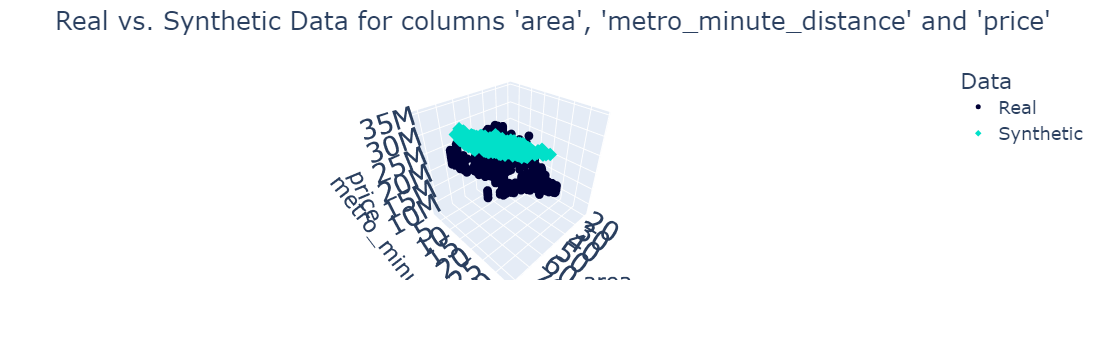

In [ ]:
from copulas.visualization import compare_3d

# Визуализация реальных и сгенерированных данных
compare_3d(frame[['area', 'metro_minute_distance', 'price']], sampled_three_df[['area', 'metro_minute_distance', 'price']])

In [ ]:
frame_1=frame
frame_1

,floor,room,balcony,area,price,metro_minute_distance
0,24,1,1,46.27,16896046,27.06
1,22,1,1,35.14,18632629,24.23
2,23,1,1,35.14,18664565,24.23
3,24,2,1,56.19,25091523,24.23
4,24,1,1,35.14,18696572,24.23
...,...,...,...,...,...,...
3392,23,0,1,22.70,10643131,2.20
3393,23,0,1,22.70,10643131,2.20
3394,23,0,1,23.00,10736968,2.20
3395,23,2,1,62.70,24772027,2.20


In [ ]:
# Объединение оригинальных и сгенерированных данных по трешкам
full_data = pd.concat([frame_1, pd.DataFrame(sampled_three_df, columns=['floor', 'room', 'balcony','area', 'price', 'metro_minute_distance'])])

full_data

,floor,room,balcony,area,price,metro_minute_distance
0,24.00,1.00,1.00,46.27,16896046.00,27.06
1,22.00,1.00,1.00,35.14,18632629.00,24.23
2,23.00,1.00,1.00,35.14,18664565.00,24.23
3,24.00,2.00,1.00,56.19,25091523.00,24.23
4,24.00,1.00,1.00,35.14,18696572.00,24.23
...,...,...,...,...,...,...
1288,27.00,3.00,1.00,66.75,33307296.47,25.47
1289,8.00,3.00,0.00,73.07,32363594.07,18.14
1290,13.00,3.00,0.00,71.94,32606169.46,20.02
1291,30.00,3.00,1.00,65.94,33575252.22,26.25


In [ ]:
# Объединение оригинальных и сгенерированных данных двушек
full_data = pd.concat([full_data , pd.DataFrame(sampled_two_df, columns=['floor', 'room', 'balcony','area', 'price', 'metro_minute_distance'])])

full_data

,floor,room,balcony,area,price,metro_minute_distance
0,24.00,1.00,1.00,46.27,16896046.00,27.06
1,22.00,1.00,1.00,35.14,18632629.00,24.23
2,23.00,1.00,1.00,35.14,18664565.00,24.23
3,24.00,2.00,1.00,56.19,25091523.00,24.23
4,24.00,1.00,1.00,35.14,18696572.00,24.23
...,...,...,...,...,...,...
760,24.00,2.00,1.00,65.39,24473634.46,26.51
762,5.00,2.00,-0.00,59.14,31476045.85,1.43
763,4.00,2.00,1.00,59.03,14693573.37,24.72
764,22.00,2.00,1.00,56.43,27725098.37,12.73


In [ ]:
full_data.isnull().any().any()


False

In [ ]:
full_data['price_per_meter'] = full_data.price / full_data.area

In [ ]:
# Подготовка данных для моделей
X = full_data.drop(columns=['price', 'price_per_meter'])
y = full_data['price_per_meter']

In [ ]:
full_data.shape

(5159, 7)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score, f1_score
from sklearn.preprocessing import LabelEncoder
import numpy as np

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Инициализация моделей
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=50, random_state=42, min_samples_leaf=3, max_depth=10),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42),
}

In [ ]:
# Обучение моделей и оценка результатов
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred_test = model.predict(X_test)
    y_pred_train = model.predict(X_train)

    # Расчёт метрик для тренировочной выборки
    mse_train = mean_squared_error(y_train*X_train.area, y_pred_train*X_train.area)
    r2_train = r2_score(y_train*X_train.area, y_pred_train*X_train.area)

    # Расчёт метрик для тестовой выборки
    mse_test = mean_squared_error(y_test*X_test.area, y_pred_test*X_test.area)
    r2_test = r2_score(y_test*X_test.area, y_pred_test*X_test.area)

    results[name] = {
        'MSE': mse_train,
        'R2 Score': r2_train,
        'MSE test': mse_test,
        'R2 Score test': r2_test,
    }

# Вывод результатов
for name, metrics in results.items():
    print(f"{name}:")
    print(f"R2 Score: {metrics['R2 Score']:.4f}")
    print(f"MSE: {metrics['MSE'] ** 0.5:.4f}")
    print(f"R2 Score test: {metrics['R2 Score test']:.4f}")
    print(f"MSE test: {metrics['MSE test'] ** 0.5:.4f}")
    print()

Linear Regression:
R2 Score: 0.9074
MSE: 2754966.8769
R2 Score test: 0.9073
MSE test: 2748179.6430

Random Forest:
R2 Score: 0.9775
MSE: 1356781.1513
R2 Score test: 0.9558
MSE test: 1897656.7088

Gradient Boosting:
R2 Score: 0.9619
MSE: 1767221.3979
R2 Score test: 0.9504
MSE test: 2011041.8039



In [ ]:
frame_full = pd.read_excel('new_flats (1) (1).xlsx', index_col=0)

In [ ]:
X = frame_full.drop(columns=['metro_name', 'size', 'price', 'latitude', 'longitude', 'porch', 'kitchen_area'])
y = frame_full['price'] / frame_full['area']

In [ ]:
# X['price_per_meter_predicted'] = models['Random Forest'].predict(X[['floor', 'room', 'balcony','area', 'metro_minute_distance']])

In [ ]:
X = pd.get_dummies(X, drop_first=True)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
models_bootsted = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=60, random_state=42, min_samples_leaf=3, max_depth=11),
    "Extra Trees": ExtraTreesRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42),
    "KNN Regressor": KNeighborsRegressor(n_neighbors=5),
    "Neural Net": MLPRegressor((10,10), learning_rate="adaptive", max_iter=10000)
}

In [ ]:
# Обучение моделей и оценка результатов
results = {}
for name, model in models_bootsted.items():
    model.fit(X_train, y_train)
    y_pred_test = model.predict(X_test)
    y_pred_train = model.predict(X_train)

    # Расчёт метрик для тренировочной выборки
    mse_train = mean_squared_error(y_train*X_train.area, y_pred_train*X_train.area)
    r2_train = r2_score(y_train*X_train.area, y_pred_train*X_train.area)

    # Расчёт метрик для тестовой выборки
    mse_test = mean_squared_error(y_test*X_test.area, y_pred_test*X_test.area)
    r2_test = r2_score(y_test*X_test.area, y_pred_test*X_test.area)

    results[name] = {
        'MSE': mse_train,
        'R2 Score': r2_train,
        'MSE test': mse_test,
        'R2 Score test': r2_test,
    }

# Вывод результатов
for name, metrics in results.items():
    print(f"{name}:")
    print(f"R2 Score: {metrics['R2 Score']:.4f}")
    print(f"MSE: {metrics['MSE'] ** 0.5:.4f}")
    print(f"R2 Score test: {metrics['R2 Score test']:.4f}")
    print(f"MSE test: {metrics['MSE test'] ** 0.5:.4f}")
    print()

Linear Regression:
R2 Score: 0.9119
MSE: 2091060.1208
R2 Score test: 0.9013
MSE test: 2344481.9079

Random Forest:
R2 Score: 0.9949
MSE: 502664.9992
R2 Score test: 0.9908
MSE test: 716990.2138

Extra Trees:
R2 Score: 1.0000
MSE: 46878.7308
R2 Score test: 0.9923
MSE test: 656190.9953

Gradient Boosting:
R2 Score: 0.9909
MSE: 672307.5093
R2 Score test: 0.9851
MSE test: 911457.1323

KNN Regressor:
R2 Score: 0.9878
MSE: 776999.4429
R2 Score test: 0.9832
MSE test: 968747.9711

Neural Net:
R2 Score: 0.9753
MSE: 1106906.3892
R2 Score test: 0.9712
MSE test: 1267258.8229



In [ ]:
user_data

RealEstateModel(size_type='EURO', renovation='Чистовая', bathroom='более 2', levels=1, floor=1, room=1, balcony=1, area=40.0, living_area=30.0, metro_minute_distance=13.0)

Ансамблевые модели - это методы машинного обучения, которые объединяют прогнозы нескольких базовых моделей для получения более точного и устойчивого прогноза, чем у каждой отдельной модели. Они основаны на идее "мудрости толпы", которая утверждает, что коллективный интеллект группы может превзойти индивидуальные умы.

Несколько особенностей ансамблевых моделей:

Уменьшение переобучения: Ансамбль моделей может уменьшить переобучение, поскольку они используют различные подходы к обучению на данных и могут лучше обобщать данные.

Повышение стабильности и надежности: Использование нескольких моделей уменьшает влияние случайных факторов и шума в данных, что делает прогнозы более стабильными и надежными.

Улучшение обобщающей способности: Ансамблевые модели могут улучшить способность к обобщению путем комбинирования прогнозов различных моделей, что позволяет получить более точные прогнозы на новых данных.

Увеличение предсказательной силы: Поскольку ансамбль моделей может использовать разнообразные подходы и информацию из различных источников, он может обнаружить сложные взаимосвязи и закономерности в данных, что приводит к более точным прогнозам.

Способность к решению сложных задач: Ансамблевые модели могут эффективно решать сложные задачи, которые могут быть недоступны для отдельных моделей, так как они могут объединять знания и прогнозы различных моделей для решения сложных проблем.

In [ ]:
import numpy as np
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.metrics import accuracy_score
param_grid = {
    'n_estimators': [50, 80, 100, 110, 120, 130, 150],
    'max_depth': [None, 10, 15, 20],
    'min_samples_leaf': [1, 2, 3]
}

In [ ]:
etc = ExtraTreesRegressor(random_state=42)
kf = KFold(n_splits=5, shuffle=True, random_state=42)
grid_search = GridSearchCV(estimator=etc, param_grid=param_grid,
                           cv=kf, n_jobs=-1, scoring='r2')
grid_search.fit(sampled_two_df.drop(columns="price"), sampled_two_df["price"])
model_two = grid_search.best_estimator_
print(grid_search.best_score_)
model_two

0.30634155015568815


ExtraTreesRegressor(max_depth=10, min_samples_leaf=3, n_estimators=130,
                    random_state=42)

In [ ]:
etc = ExtraTreesRegressor(random_state=42)
kf = KFold(n_splits=5, shuffle=True, random_state=42)
grid_search = GridSearchCV(estimator=etc, param_grid=param_grid,
                           cv=kf, n_jobs=-1, scoring='r2')
grid_search.fit(sampled_three_df.drop(columns="price"), sampled_three_df["price"])
model_three = grid_search.best_estimator_
print(grid_search.best_score_)
model_three

0.8836708356549063


ExtraTreesRegressor(n_estimators=80, random_state=42)

In [ ]:
etc = ExtraTreesRegressor(random_state=42)
kf = KFold(n_splits=5, shuffle=True, random_state=42)
grid_search = GridSearchCV(estimator=etc, param_grid=param_grid,
                           cv=kf, n_jobs=-1, scoring='r2')
X = full_data[full_data.room<=1].drop(columns=["price", 'price_per_meter'])
y = full_data[full_data.room<=1]["price"]
grid_search.fit(X, y)
model_one = grid_search.best_estimator_
print(grid_search.best_score_)
model_one

0.9939724392357998


ExtraTreesRegressor(max_depth=20, n_estimators=150, random_state=42)

## Построение комбнированной модели

На квартиры c разным размером используются отдельные регрессионые модели, затем результаты предсказания добавляются к исходным данным и строится модель предсказания на основе этих показателей

In [ ]:
frame_full = pd.read_excel('new_flats (1) (1).xlsx', index_col=0)

In [ ]:
import pandas as pd

class FlatPricePredictor:
    def __init__(self, model_1_room, model_2_rooms, model_3_rooms):
        self.model_1_room = model_1_room
        self.model_2_rooms = model_2_rooms
        self.model_3_rooms = model_3_rooms

    def predict(self, X):
        if isinstance(X, pd.DataFrame) and 'rooms' in X.columns:
            rooms = X['rooms']
            predictions = []
            for i, row in X.iterrows():
                if row['rooms'] == 1:
                    predictions.append(self.model_1_room.predict([row])[0])
                elif row['rooms'] == 2:
                    predictions.append(self.model_2_rooms.predict([row])[0])
                elif row['rooms'] == 3:
                    predictions.append(self.model_3_rooms.predict([row])[0])
                else:
                    raise ValueError("Invalid number of rooms. This predictor only supports 1, 2, and 3 room flats.")
            return predictions

In [ ]:
import pandas as pd
from sklearn.base import BaseEstimator, RegressorMixin

class CombinedModel():
    def __init__(self, base_model, additional_model, base_columns):

        self.base_model = base_model
        self.additional_model = additional_model
        self.base_columns = base_columns

    def fit(self, X, y):

        base_predictions = self.base_model.predict(X[self.base_columns])

        X_combined = X.copy()
        X_combined['base_prediction'] = base_predictions

        self.additional_model.fit(X_combined, y)

        return self

    def predict(self, X):
        # print(X.columns)
        base_predictions = self.base_model.predict(X[self.base_columns])
        X_combined = X.copy()
        X_combined['base_prediction'] = base_predictions
        predictions = self.additional_model.predict(X_combined)

        return predictions

    def evaluate(self, X_train, y_train, X_test, y_test):
        y_pred_train = self.predict(X_train)
        y_pred_test = self.predict(X_test)

        train_mse = mean_squared_error(y_train, y_pred_train)
        train_r2 = r2_score(y_train, y_pred_train)
        test_mse = mean_squared_error(y_test, y_pred_test)
        test_r2 = r2_score(y_test, y_pred_test)

        print(f"Training MSE: {train_mse**(0.5):.4f}, Training R2: {train_r2:.4f}")
        print(f"Test MSE: {test_mse **(0.5):.4f}, Test R2: {test_r2:.4f}")

In [ ]:
frame_full = frame_full.drop(columns=['metro_name', 'size', 'porch', 'kitchen_area', 'latitude', 'longitude'])
frame_full = frame_full[frame_full.room!=4]

In [ ]:
X = pd.get_dummies(frame_full.drop(columns='price'))
y = frame_full['price']

In [ ]:
combined_model = CombinedModel(price_predictor, ExtraTreesRegressor( n_estimators=200, min_samples_leaf=1, max_depth=15, random_state=42), ['floor', 'room', 'balcony','area', 'metro_minute_distance'])

In [ ]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=42)
combined_model.fit(X_train, y_train)
combined_model.evaluate( X_train, y_train, X_test, y_test)

Training MSE: 57750.5778, Training R2: 0.9999
Test MSE: 511617.9477, Test R2: 0.9954


## Получаем пресказание

In [ ]:
from pydantic import BaseModel, Field, field_validator, model_validator
from typing import Literal

class RealEstateModel(BaseModel):
    size_type: Literal['EURO', 'CLASSIC'] = Field(..., description="Тип размера: EURO или CLASSIC")
    renovation: Literal['Без отделки', 'Чистовая'] = Field(..., description="Ремонт: Без отделки или Чистовая")
    bathroom: Literal['совмещенный', 'раздельный', 'более 2'] = Field(..., description="Тип ванной комнаты: совмещенный, раздельный, более 2")
    levels: int = Field(..., gt=0, description="Количество уровней, должно быть больше 0")
    floor: int = Field(..., gt=0, description="Этаж, должен быть больше 0")
    room: int = Field(..., gt=0, description="Количество комнат, должно быть больше 0")
    balcony: int = Field(..., gt=0, description="Количество балконов, должно быть больше 0")
    area: float = Field(..., gt=0, description="Общая площадь, должна быть положительным числом")
    living_area: float = Field(..., gt=0, description="Жилая площадь, должна быть положительным числом")
    metro_minute_distance: float = Field(..., gt=0, description="Расстояние до метро в минутах, должно быть положительным числом")

    @model_validator(mode='after')
    def validate_living_area(self):
        if self.area < self.living_area:
            raise ValueError('Жилая площадь не может превышать общую площадь')
        return self


In [ ]:
def get_user_input():
    inputs = {}

    fields = [
        ('size_type', "Введите тип размера ('EURO' или 'CLASSIC'): ", str),
        ('renovation', "Введите тип ремонта ('Без отделки' или 'Чистовая'): ", str),
        ('bathroom', "Введите тип ванной комнаты ('совмещенный', 'раздельный' или 'более 2'): ", str),
        ('levels', "Введите количество уровней (int > 0): ", int),
        ('floor', "Введите этаж (int > 0): ", int),
        ('room', "Введите количество комнат (int > 0): ", int),
        ('balcony', "Введите количество балконов (int > 0): ", int),
        ('area', "Введите общую площадь (float > 0): ", float),
        ('living_area', "Введите жилую площадь (float > 0): ", float),
        ('metro_minute_distance', "Введите расстояние до метро в минутах (float > 0): ", float)
    ]

    for field, prompt, field_type in fields:
        while True:
            try:
                user_input = input(prompt)
                if field_type == int:
                    user_input = int(user_input)
                elif field_type == float:
                    user_input = float(user_input)
                inputs[field] = user_input
                break
            except ValueError:
                print(f"Некорректный ввод. Ожидается {field_type.__name__}.")

    try:
        real_estate = RealEstateModel(**inputs)
        return real_estate
    except ValueError as e:
        print(f"Ошибка валидации: {e}")
        return None

# Получение пользовательских данных
user_data = get_user_input()
if user_data:
    print(f"Введенные данные: {user_data}")


Введите тип размера ('EURO' или 'CLASSIC'):  
Введите тип ремонта ('Без отделки' или 'Чистовая'):  
Введите тип ванной комнаты ('совмещенный', 'раздельный' или 'более 2'):  
Введите количество уровней (int > 0):  


Некорректный ввод. Ожидается int.


Введите количество уровней (int > 0):  


Некорректный ввод. Ожидается int.


Введите количество уровней (int > 0):  


Некорректный ввод. Ожидается int.


Введите количество уровней (int > 0):  


Некорректный ввод. Ожидается int.


Введите количество уровней (int > 0):  


Некорректный ввод. Ожидается int.


Введите количество уровней (int > 0):  


Некорректный ввод. Ожидается int.


Введите количество уровней (int > 0):  


Некорректный ввод. Ожидается int.


Введите количество уровней (int > 0):  


Некорректный ввод. Ожидается int.


Введите количество уровней (int > 0):  0
Введите этаж (int > 0):  0
Введите количество комнат (int > 0):  0
Введите количество балконов (int > 0):  0
Введите общую площадь (float > 0):  0
Введите жилую площадь (float > 0):  000
Введите расстояние до метро в минутах (float > 0):  0


Ошибка валидации: 10 validation errors for RealEstateModel
size_type
  Input should be 'EURO' or 'CLASSIC' [type=literal_error, input_value='', input_type=str]
    For further information visit https://errors.pydantic.dev/2.6/v/literal_error
renovation
  Input should be 'Без отделки' or 'Чистовая' [type=literal_error, input_value='', input_type=str]
    For further information visit https://errors.pydantic.dev/2.6/v/literal_error
bathroom
  Input should be 'совмещенный', 'раздельный' or 'более 2' [type=literal_error, input_value='', input_type=str]
    For further information visit https://errors.pydantic.dev/2.6/v/literal_error
levels
  Input should be greater than 0 [type=greater_than, input_value=0, input_type=int]
    For further information visit https://errors.pydantic.dev/2.6/v/greater_than
floor
  Input should be greater than 0 [type=greater_than, input_value=0, input_type=int]
    For further information visit https://errors.pydantic.dev/2.6/v/greater_than
room
  Input should 

In [ ]:
def convert_input_to_X(user_input, columns):
    x = pd.Series([0]*len(columns), index=columns)
    for el in user_input:
        if isinstance(el[1], str):
            if f'{el[0]}_{el[1]}' in columns:
                x[f'{el[0]}_{el[1]}'] = 1
        else:
            x[el[0]] = el[1]
    return pd.DataFrame(x).T

In [ ]:
convert_input_to_X(user_data, X.columns)

,levels,floor,room,balcony,area,living_area,metro_minute_distance,size_type_CLASSIC,size_type_EURO,renovation_Без отделки,renovation_Чистовая,bathroom_более 2,bathroom_раздельный,bathroom_совмещенный
0,1,4,3,1,40,35,13,0,1,1,0,0,1,0


In [ ]:
combined_model.predict(convert_input_to_X(user_data, X.columns))

array([29328945.49333333])